# Project Name: Iris Flower Classification Using Multiple Machine Learning Algorithms with Cross-Validation Model Selection

## Overview
The Iris flower classification is a fundamental machine learning problem that serves as an excellent introduction to supervised learning techniques. This project demonstrates how to build, compare, and select the best classification model using multiple algorithms and proper evaluation methodologies.

You have:
● **Feature data**: Sepal length, sepal width, petal length, petal width measurements (in cm)
● **Target data**: Three iris species classifications (Setosa, Versicolor, Virginica)
● **Dataset size**: 150 samples with 4 numerical features each, perfectly balanced across 3 classes

We will:
1. **Explore the dataset** using visualizations to understand feature distributions, correlations, and class separability
2. **Implement three different classification algorithms**: K-Nearest Neighbors (KNN), Decision Tree Classifier, and Support Vector Machine (SVM)
3. **Apply cross-validation techniques** to perform robust model selection and avoid overfitting
4. **Evaluate model performance** using multiple metrics including accuracy, confusion matrix, and classification reports

## Goal
Data scientists and machine learning practitioners can use this comprehensive workflow to understand:
- How to properly evaluate and compare multiple classification algorithms
- The importance of cross-validation in model selection
- Best practices for training, validating, and testing machine learning models
- How different algorithms perform on a well-structured classification problem

This project serves as a foundation for more complex classification tasks and demonstrates the complete machine learning pipeline from data exploration to final model evaluation.


#### Importing Libraries

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Model evaluation and selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dataset loading
from sklearn.datasets import load_iris

import base64
from IPython.display import display, HTML
import os

# Set random state for reproducibility
np.random.seed(42)


#### Notebook utility

In [16]:
image_paths = ["knn1","knn2","dc1","dc2","dc3","svm1","svm2","svm3"]
image_size = [700]*8
images_html = []

mime_map = {
    ".png": "image/png",
    ".jpg": "image/jpeg",
    ".jpeg": "image/jpeg",
    ".gif": "image/gif",
    ".webp": "image/webp"
}

for i, path in enumerate(image_paths):
    ext = os.path.splitext(path)[1].lower()
    mime = mime_map.get(ext, "image/png")

    with open("img/"+path+".png", "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode("utf-8")

    img_tag = f'<img src="data:{mime};base64,{encoded}" style="display: block; margin-left: auto; margin-right: auto; width: {image_size[i]}px;" /><br>'
    images_html.append(img_tag)


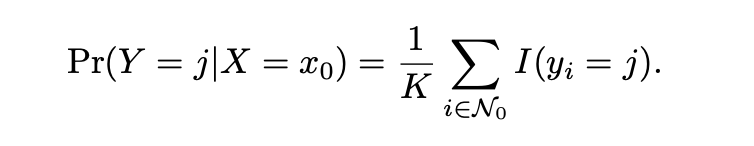

In [17]:
display(HTML(images_html[0]))


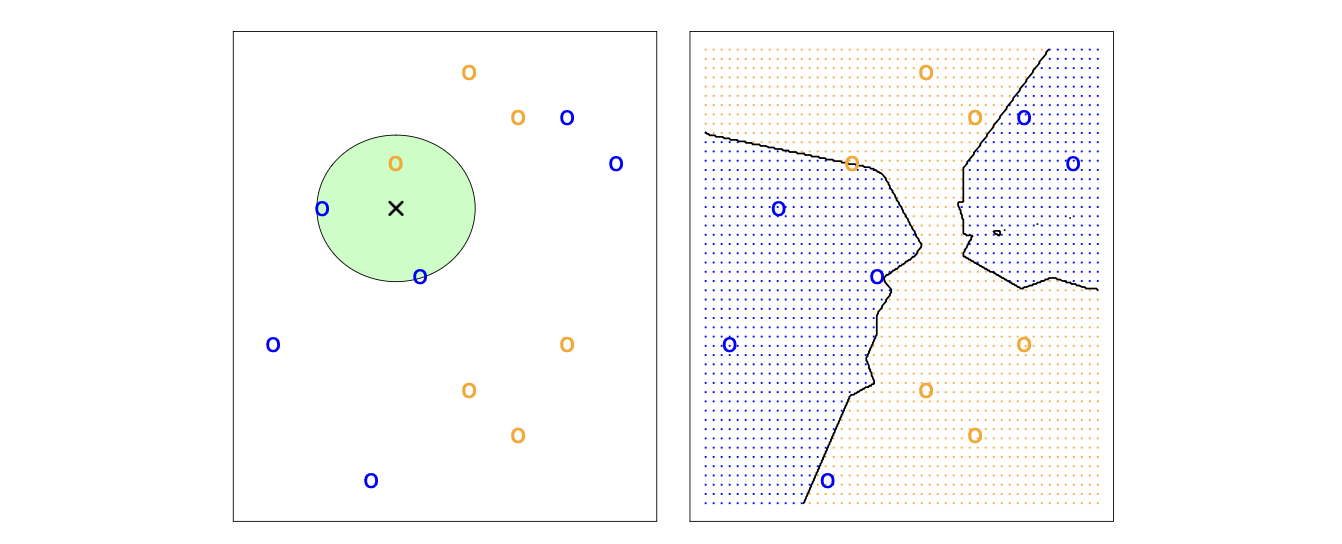

In [18]:
display(HTML(images_html[1]))


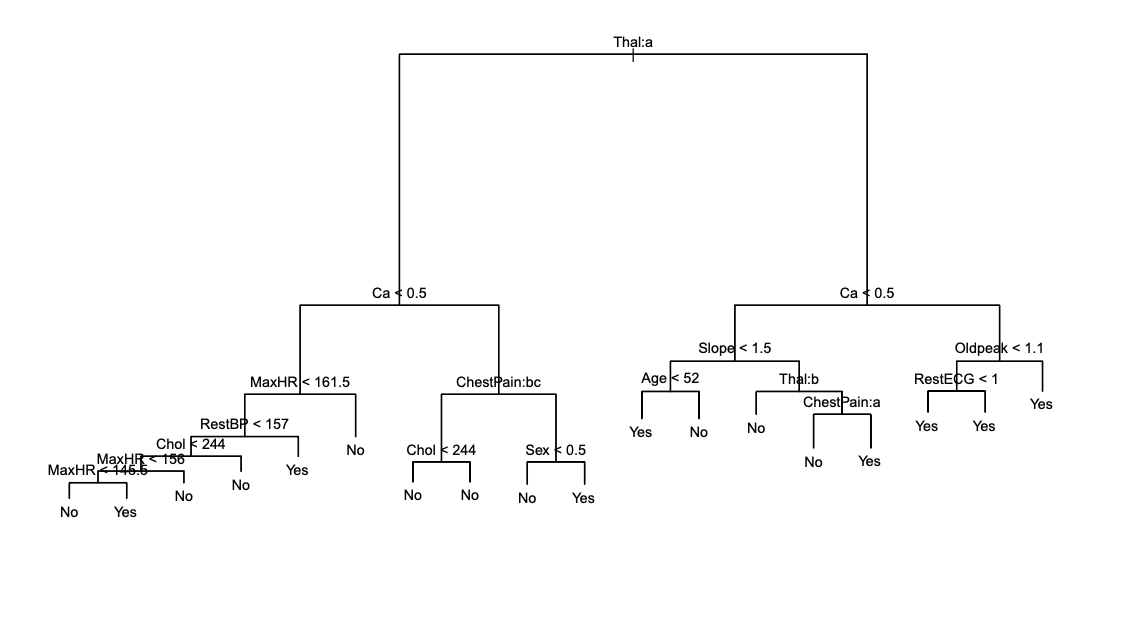

In [19]:
display(HTML(images_html[4]))


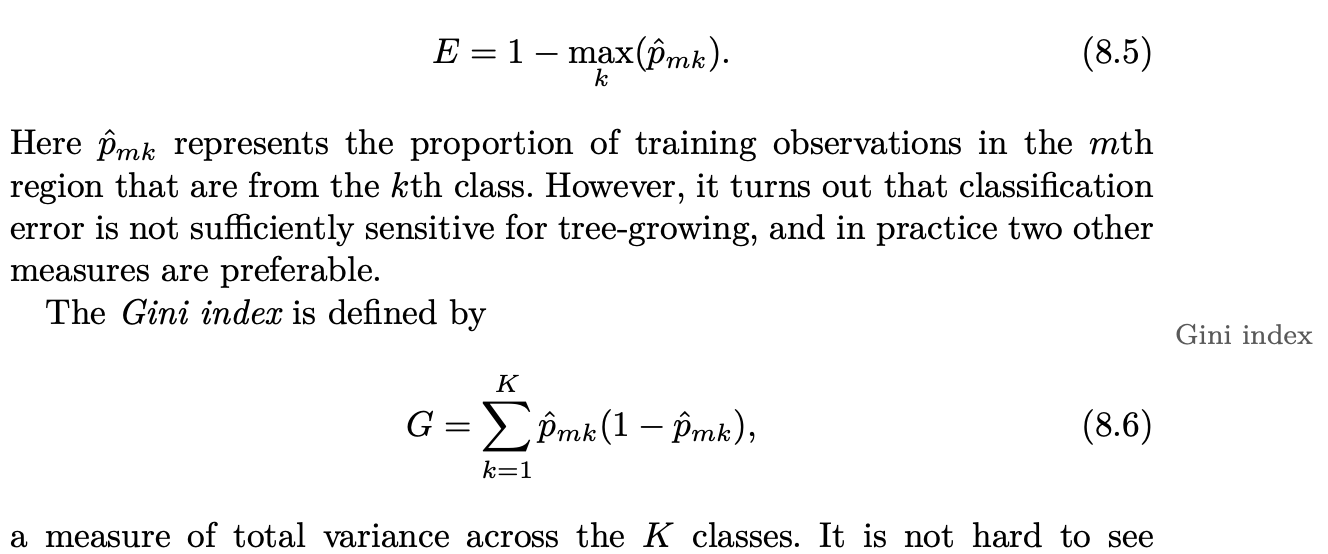

In [20]:
display(HTML(images_html[2]))


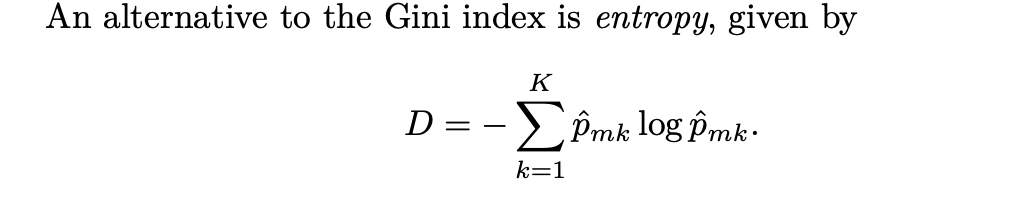

In [21]:
display(HTML(images_html[3]))


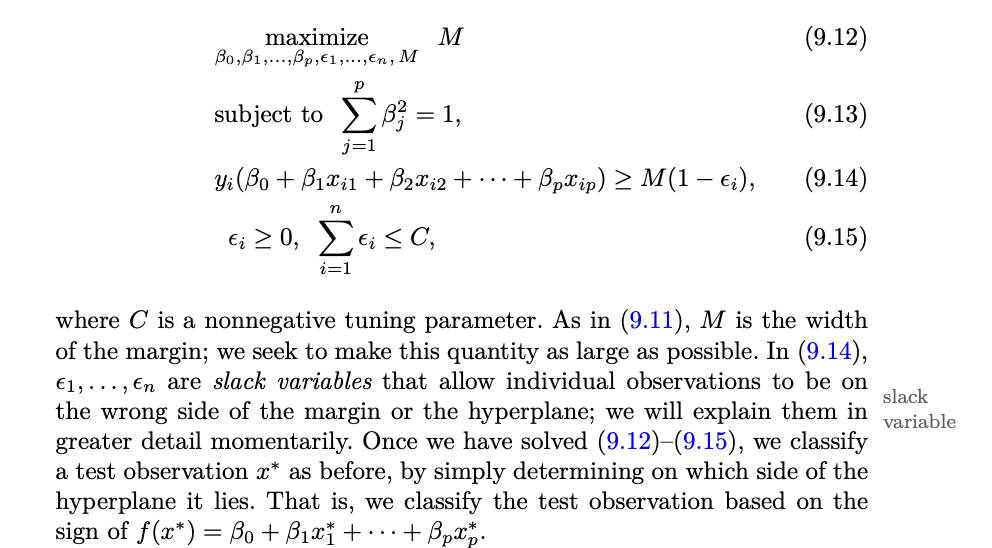

In [22]:
display(HTML(images_html[5]))


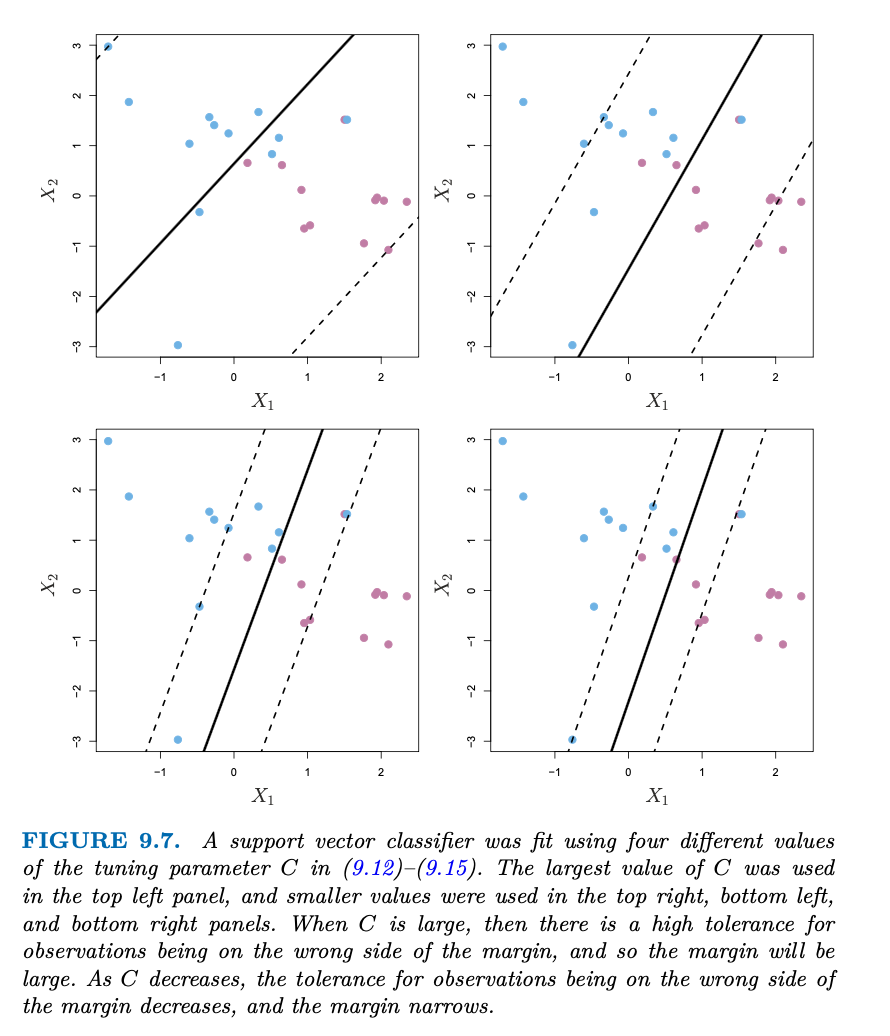

In [23]:
display(HTML(images_html[6]))


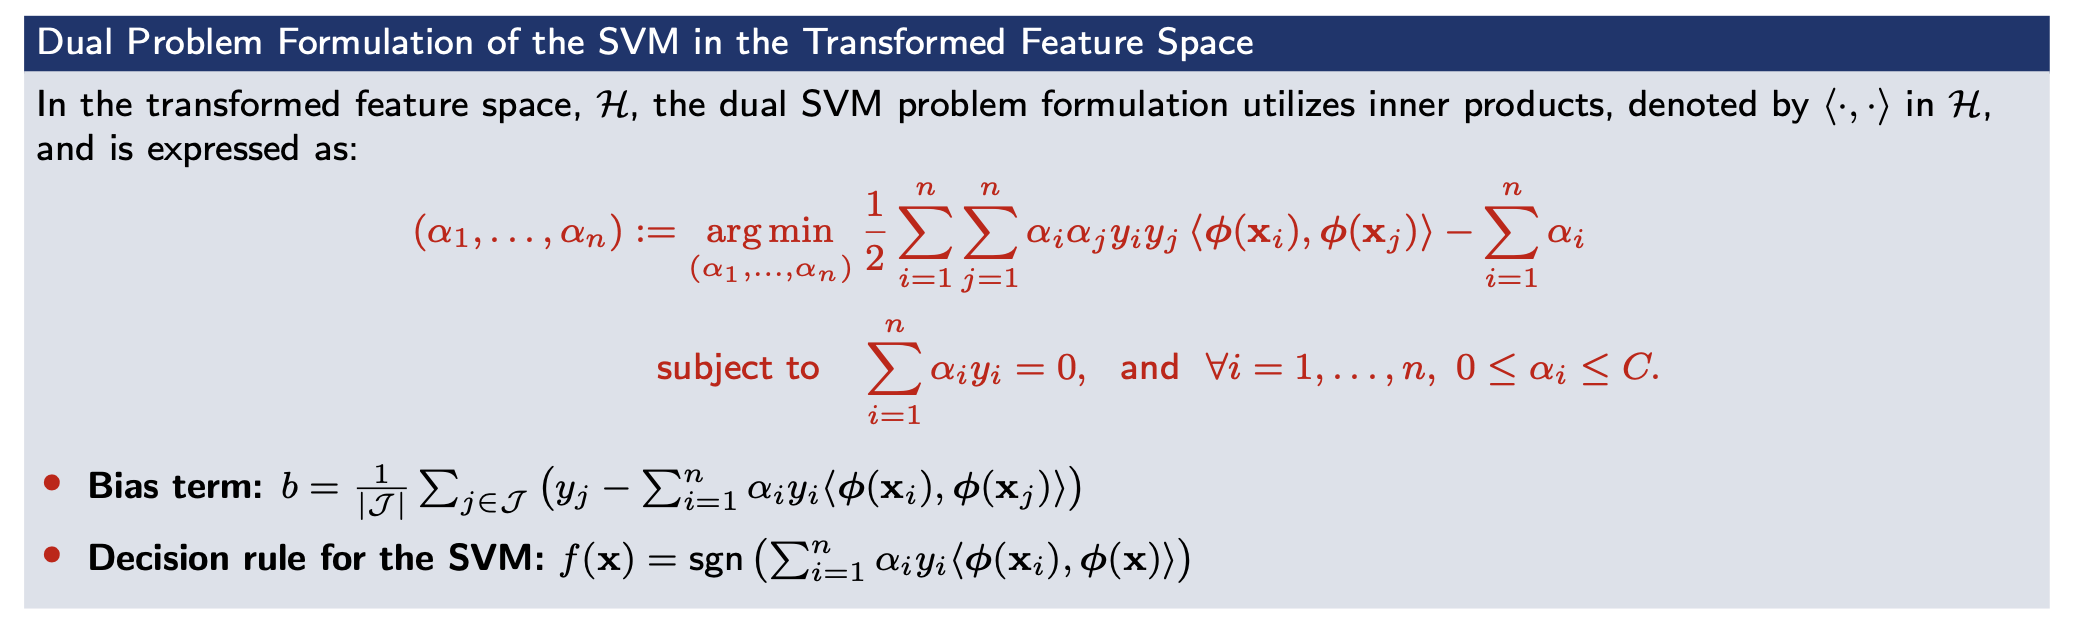

In [24]:
display(HTML(images_html[7]))

#### Loading the Dataset

In [12]:
# Load the Iris dataset from sklearn
iris = load_iris()

# Convert to pandas DataFrame for easier manipulation
# Features: sepal length, sepal width, petal length, petal width
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target column with class names
iris_df['target'] = iris.target
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display basic information about the dataset
print("Dataset shape:", iris_df.shape)
print("\nFirst 5 rows:")
print(iris_df.head())

print("\nDataset info:")
print(iris_df.info())


Dataset shape: (150, 6)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   pe

#### Exploratory Data Analysis (EDA)

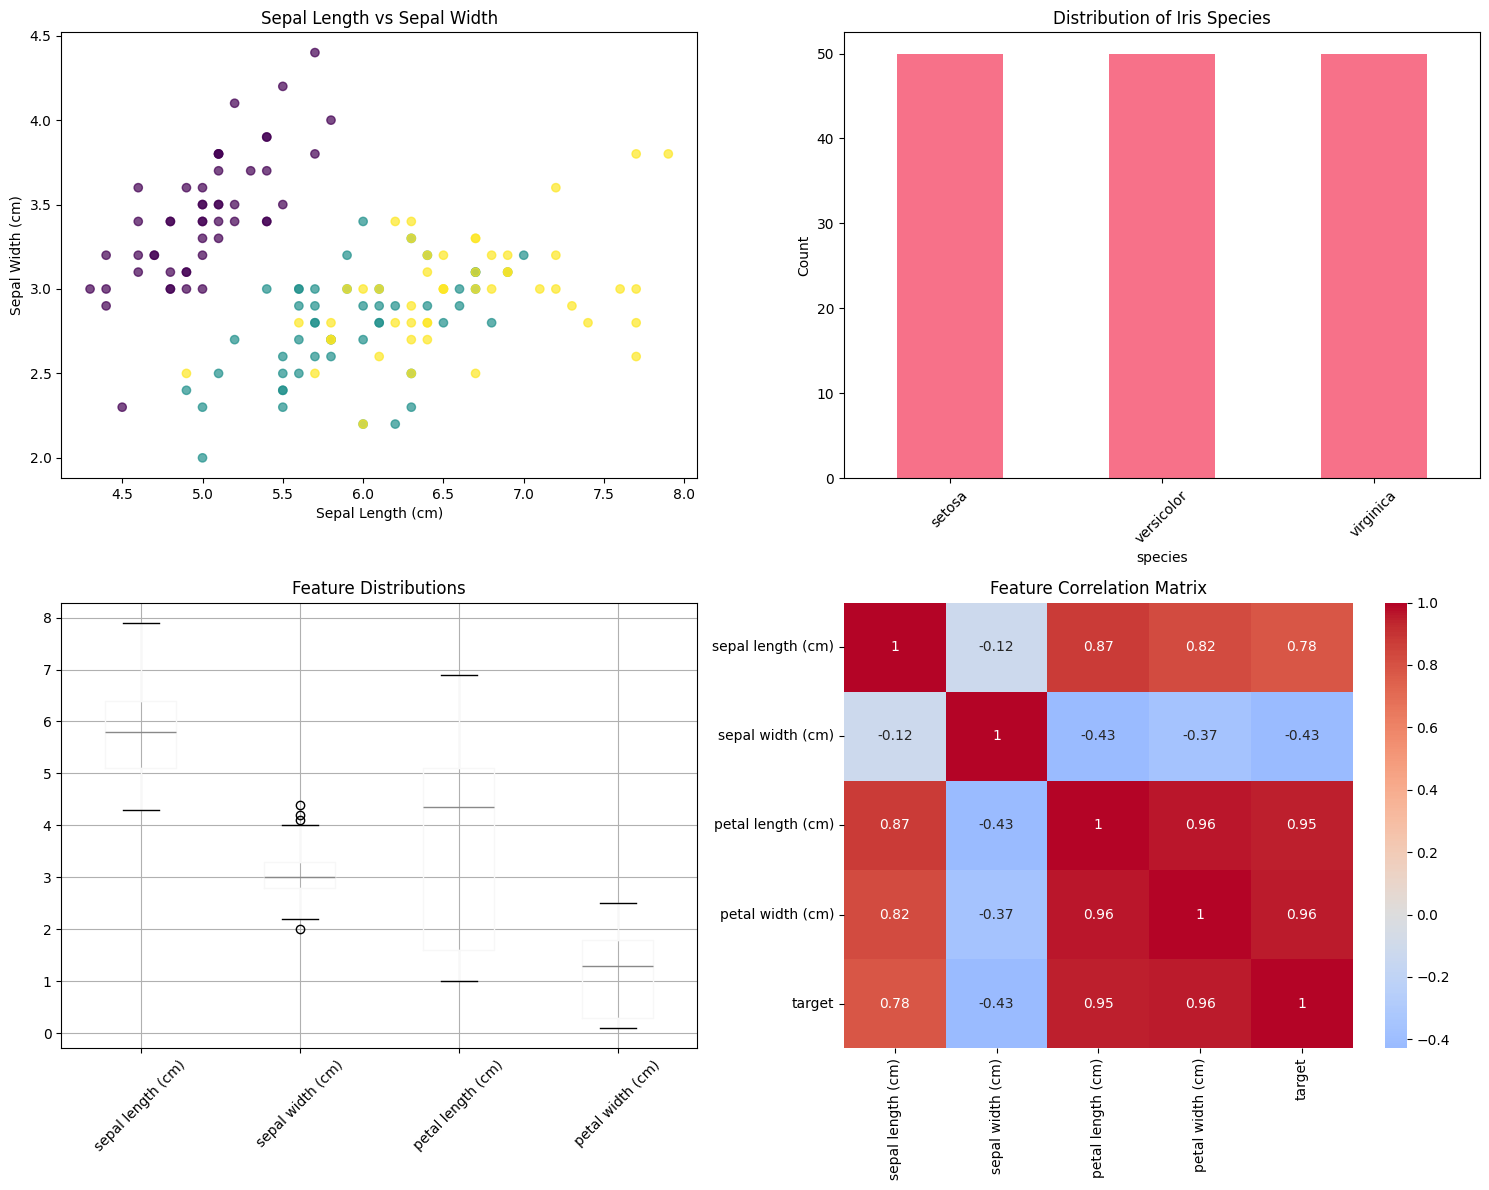

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [13]:
# Set the style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for comprehensive EDA
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Pairplot to show relationships between features
plt.subplot(2, 2, 1)
# Note: We'll create a simple scatter plot instead of full pairplot for clarity
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], 
           c=iris_df['target'], alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

# 2. Class distribution
plt.subplot(2, 2, 2)
iris_df['species'].value_counts().plot(kind='bar')
plt.title('Distribution of Iris Species')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 3. Feature distributions
plt.subplot(2, 2, 3)
iris_df.boxplot(column=['sepal length (cm)', 'sepal width (cm)', 
                       'petal length (cm)', 'petal width (cm)'], ax=plt.gca())
plt.title('Feature Distributions')
plt.xticks(rotation=45)

# 4. Correlation heatmap
plt.subplot(2, 2, 4)
correlation_matrix = iris_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

# Display summary statistics
print("Summary Statistics:")
print(iris_df.describe())


#### Training - Testing Split

Split the dataset into training and testing sets
- 80% for training, 20% for testing
- stratify ensures equal representation of all classes in both sets

In [14]:
# Separate features (X) and target labels (y)
# Features: all columns except target and species name
X = iris_df.drop(['target', 'species'], axis=1)

# Target: the class labels (0, 1, 2)
y = iris_df['target']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:")
print(X.columns.tolist())
print("\nTarget classes:")
print(np.unique(y))



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts().sort_index())
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts().sort_index())


Features shape: (150, 4)
Target shape: (150,)

Feature columns:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target classes:
[0 1 2]
Training set size: 120
Test set size: 30

Class distribution in training set:
target
0    40
1    40
2    40
Name: count, dtype: int64

Class distribution in test set:
target
0    10
1    10
2    10
Name: count, dtype: int64


#### Define Models
1. K-Nearest Neighbors (KNN)
2. Decision Tree Classifier
3. Support Vector Machine (SVM)

In [15]:
# Initialize three different classification algorithms

# K-Nearest Neighbors (KNN)
# Classifies based on the majority class of k nearest neighbors
# Simple, non-parametric algorithm that works well for small datasets
knn = KNeighborsClassifier(n_neighbors=5)

# 2. Decision Tree Classifier
# Creates a tree-like model of decisions based on feature values
# Easy to interpret and visualize, handles both numerical and categorical data
dt = DecisionTreeClassifier(random_state=42)

# 3. Support Vector Machine (SVM)
# Finds the optimal hyperplane to separate different classes
# Effective for high-dimensional data and when classes are clearly separable
svm = SVC(random_state=42)

# Store models in a dictionary for easy iteration
models = {
    'K-Nearest Neighbors': knn,
    'Decision Tree': dt,
    'Support Vector Machine': svm
}

print("Models initialized:")
for name in models.keys():
    print(f"- {name}")


Models initialized:
- K-Nearest Neighbors
- Decision Tree
- Support Vector Machine


#### Cross-Validation for Model Selection

In [16]:
# Perform 5-fold cross-validation for each model
# Cross-validation helps estimate how well each model will generalize to unseen data
# It splits the training data into 5 folds, trains on 4 folds, tests on 1 fold
# This process is repeated 5 times with different test folds

cv_scores = {}

print("Cross-Validation Results (5-fold):")
print("-" * 50)

for name, model in models.items():
    # Perform cross-validation and get accuracy scores for each fold
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Store results
    cv_scores[name] = scores
    
    # Display results
    print(f"{name}:")
    print(f"  Individual fold scores: {scores}")
    print(f"  Mean accuracy: {scores.mean():.4f}")
    print(f"  Standard deviation: {scores.std():.4f}")
    print()
    
    
# Compare cross-validation scores to select the best model
print("Model Comparison Summary:")
print("-" * 40)

best_model_name = None
best_score = 0

for name, scores in cv_scores.items():
    mean_score = scores.mean()
    print(f"{name}: {mean_score:.4f} (+/- {scores.std() * 2:.4f})")
    
    # Track the best performing model
    if mean_score > best_score:
        best_score = mean_score
        best_model_name = name

print(f"\nBest performing model: {best_model_name}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

# Get the best model object
best_model = models[best_model_name]


Cross-Validation Results (5-fold):
--------------------------------------------------
K-Nearest Neighbors:
  Individual fold scores: [0.91666667 1.         0.95833333 1.         1.        ]
  Mean accuracy: 0.9750
  Standard deviation: 0.0333

Decision Tree:
  Individual fold scores: [0.91666667 0.95833333 0.95833333 0.95833333 0.91666667]
  Mean accuracy: 0.9417
  Standard deviation: 0.0204

Support Vector Machine:
  Individual fold scores: [0.95833333 0.95833333 0.95833333 1.         1.        ]
  Mean accuracy: 0.9750
  Standard deviation: 0.0204

Model Comparison Summary:
----------------------------------------
K-Nearest Neighbors: 0.9750 (+/- 0.0667)
Decision Tree: 0.9417 (+/- 0.0408)
Support Vector Machine: 0.9750 (+/- 0.0408)

Best performing model: K-Nearest Neighbors
Best cross-validation accuracy: 0.9750


#### Train the best performing model on the complete training dataset


In [17]:
# This gives the model access to all available training data for final training
print(f"Training {best_model_name} on full training dataset...")

# Fit the best model on all training data
best_model.fit(X_train, y_train)

print("Training completed successfully!")
print(f"Model trained on {X_train.shape[0]} samples with {X_train.shape[1]} features")


Training K-Nearest Neighbors on full training dataset...
Training completed successfully!
Model trained on 120 samples with 4 features


#### Make predictions on the test set


Test Set Evaluation for K-Nearest Neighbors:
--------------------------------------------------
Test Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


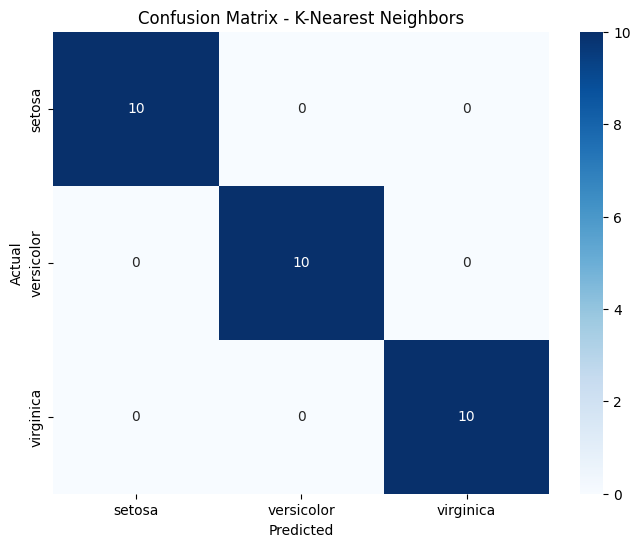


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
y_pred = best_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Set Evaluation for {best_model_name}:")
print("-" * 50)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate confusion matrix
# Shows how many samples were correctly/incorrectly classified for each class
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Create a more readable confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate detailed classification report
# Provides precision, recall, and F1-score for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


# Conclusion

## Summary of Work Performed

1. **Exploratory Data Analysis**: Visualized the Iris dataset to understand feature distributions and class balance.

2. **Model Training**: Implemented three classification algorithms: KNN, Decision Tree, and SVM.

3. **Model Selection**: Used 5-fold cross-validation to compare model performance and select the best algorithm.

4. **Final Evaluation**: Trained the best model on full training data and evaluated on the test set.

## Best Performing Model

The **K-Nearest Neighbors** achieved the highest cross-validation accuracy and was selected as the final model.

## Key Learning Points

- Cross-validation provides robust model selection by reducing random variation effects
- Different algorithms have unique strengths: KNN is intuitive, Decision Trees are interpretable, SVMs handle complex boundaries
- This workflow demonstrates the complete ML pipeline from exploration to evaluation

This notebook showcases essential machine learning concepts using the classic Iris classification problem.
